In [643]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import uncrater as uc
from uncrater.utils import cordic2rad, rad2cordic, cordic_add
alpha_to_pdrift = 50e3*4096*16/102.4e6*2*np.pi*1e-6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [779]:
import json
def read_adc(ch):
    jdata = json.load(open(f'/u/home/anze/Nov21/adc{ch}_output.json'))
    data = np.array(jdata['data'])
    data[data>8192]-=16384
    return data

ewf = [read_adc(ch+1) for ch in range(4)]

def spec(w):
    return np.abs(np.fft.rfft(w)**2)

Analyzing 64 files from session_calibrator/cdi_output.
Analyzing 575 files from session_calibrator_x/cdi_output.


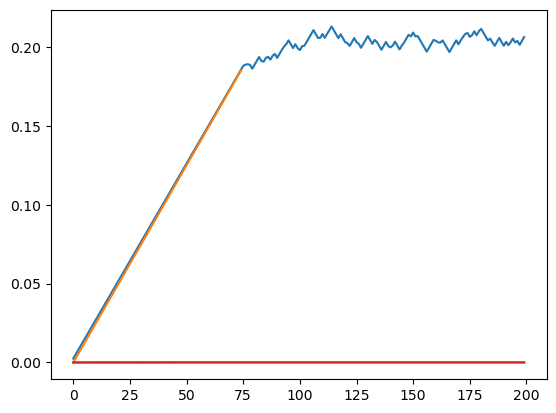

In [ ]:
C = uc.Collection("session_calibrator/cdi_output", cut_to_hello=True)


Cd = uc.Collection("session_calibrator_x/cdi_output", cut_to_hello=True)

plt.plot(C.cd_drift[:200]/alpha_to_pdrift)
#plt.plot(np.arange(75), np.arange(75)*0.0025)
plt.plot(C.cd_have_lock[:200]*1e-5)
plt.plot(Cd.cd_drift[:200])
#C.cd_drift[200:2000].std(),Cd.cd_drift[200:2000].std()

/u/home/anze/anaconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/u/home/anze/anaconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]

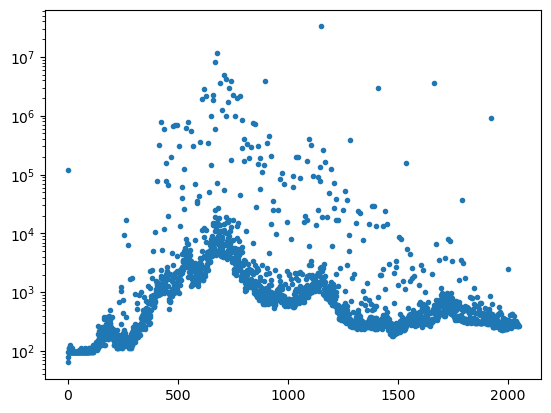

In [793]:
for i in [0,7]:
    plt.plot(np.mean(np.array([sp[2].data[:] for sp in C.spectra[i::8]]),axis=0),'.')
plt.semilogy()

([np.float64(641.0), np.float64(661.0), np.float64(721.0), np.float64(664.0)],)

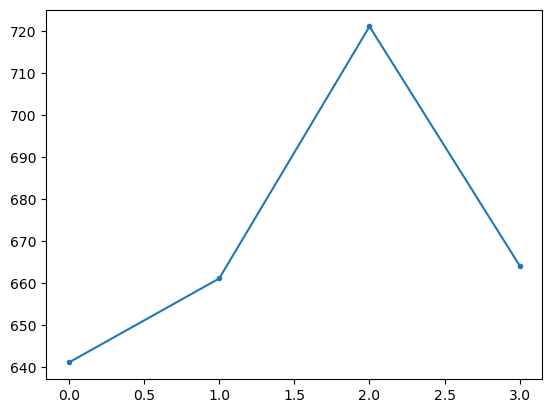

In [794]:
plt.plot([sp[1].data[1201] for sp in C.spectra],'.-')
#plt.plot([sp[2].data[1202] for sp in C.spectra])
#plt.plot([sp[0].data[1203] for sp in C.spectra])

13+(22-13)*25/len(C.spectra)

[sp[1].data[1201] for sp in C.spectra],


Text(0, 0.5, 'Relative drift [ppm]')

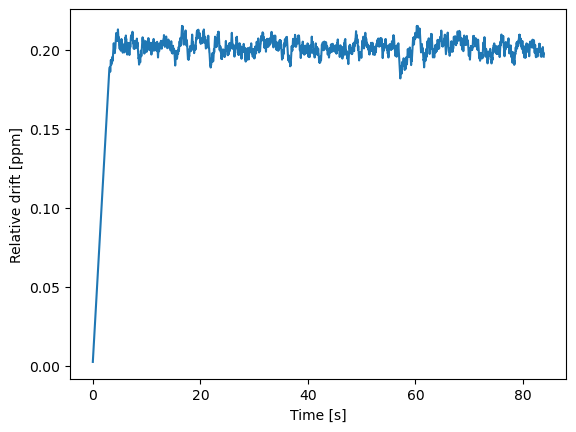

In [800]:
time = np.arange(len(C.cd_drift))*64*16*4096/102.4e6
plt.plot(time,C.cd_drift/alpha_to_pdrift)
plt.xlabel('Time [s]')  
plt.ylabel('Relative drift [ppm]')
#plt.xlim(0,1)
#plt.plot(Cd.cd_drift[:125]/alpha_to_pdrift)



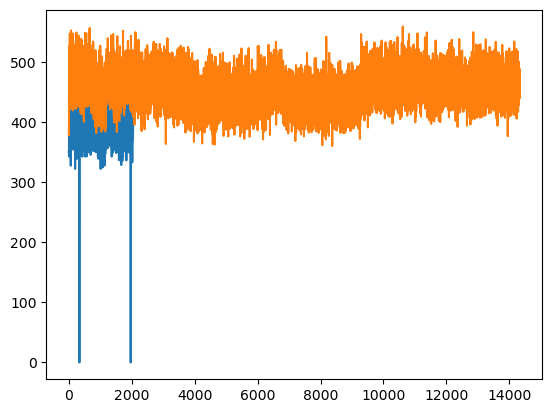

In [799]:

#plt.plot(C.cd_drift/alpha_to_pdrift, C.cd_snr3)
#plt.plot(C.cd_drift, C.cd_powertop1)
plt.plot(C.cd_snr1)
plt.plot(Cd.cd_snr1*8)
#plt.plot(C.cd_snr3)

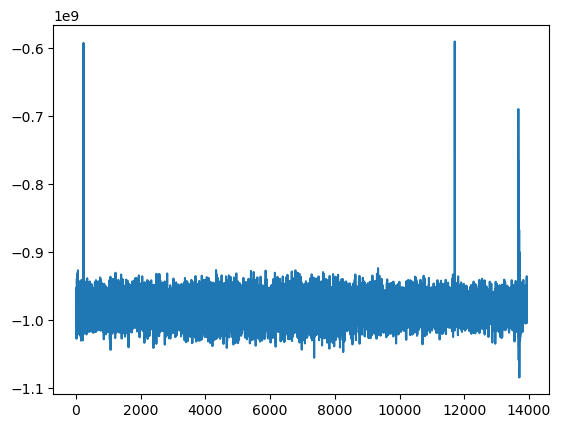

In [755]:
#plt.plot (C.cd_sd2[200:])
plt.plot (C.cd_sdx[400:])

#plt.plot (C.cd_snr3[200:])
#plt.plot(C.cd_powerbot3)

np.float64(0.055047149803654945)

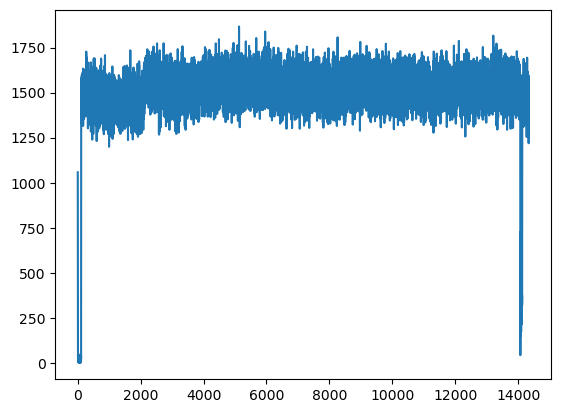

In [756]:
plt.plot(C.cd_snr2)
C.cd_powerbot2[:4000].std()/C.cd_powerbot2[:4000].mean()
#Cd.cd_powertop2[1000:3000].mean()/C.cd_powertop2[1000:3000].mean()

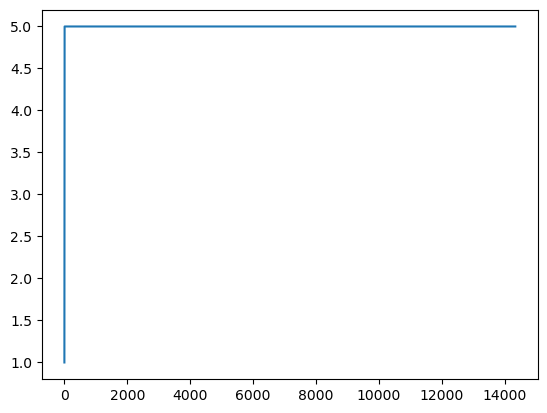

In [757]:
plt.plot(C.cd_have_lock)

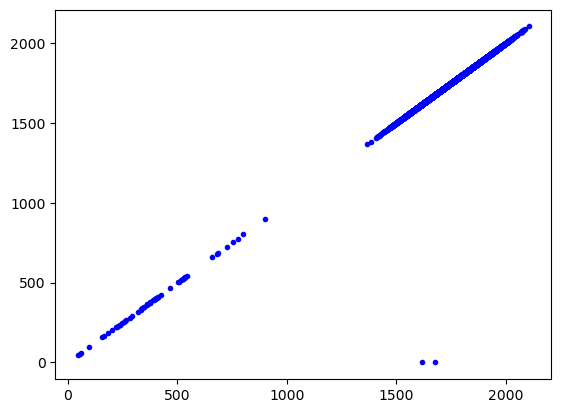

In [758]:
#plt.plot(Cd.cd_snr1[200:])
plt.plot(C.cd_powertop1[200:]/C.cd_powerbot1[200:], C.cd_snr1[200:],'b.')
#plt.plot()


#plt.plot(C.cd_fd2[1200:])
#plt.plot(C.cd_fd3[1200:])


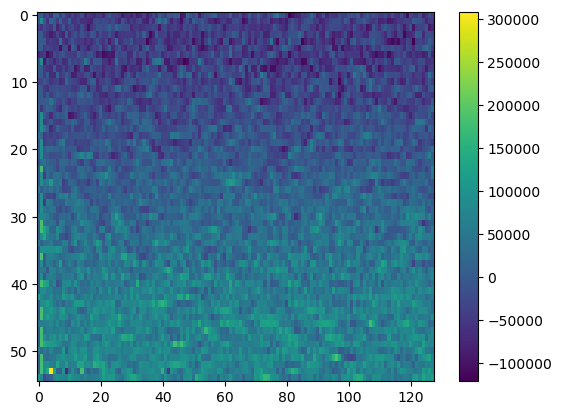

In [762]:
plt.imshow(C.calib_gphase[3:,:128],aspect='auto', interpolation='nearest')
plt.colorbar()

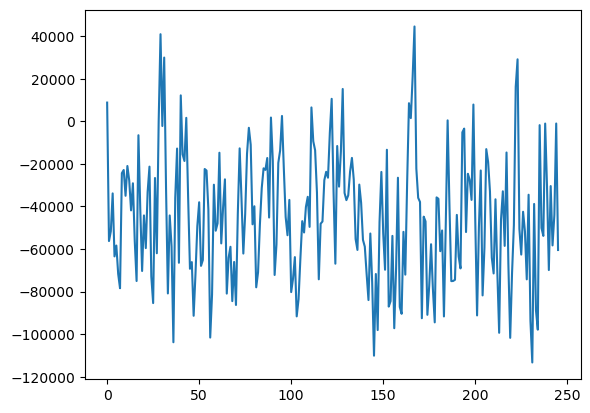

In [763]:
plt.plot(C.calib_gphase[4,10:256])

[]

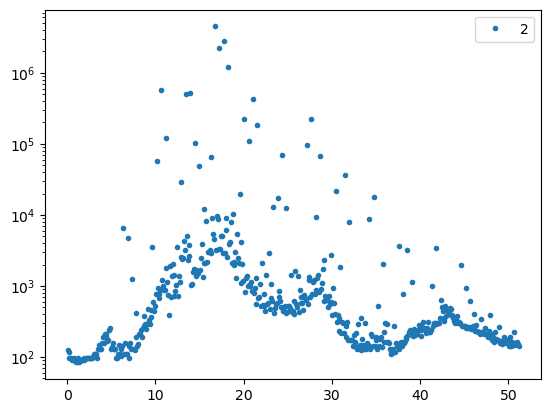

In [764]:
f = C.spectra[0][0].frequency
s0 = C.spectra[0][3].data[:]
s1 = C.spectra[1][3].data[:]
s2 = C.spectra[2][3].data[:]
#plt.plot(f,s2)
for i in [2]:
    plt.plot(f[i::4], s2[i::4],'.', label=str(i))
plt.legend()
#plt.plot(s1,'g.')
#plt.plot(s2,'b.')
#plt.plot(s1*0.001,'r.')

plt.semilogy()

Text(0, 0.5, 'power')

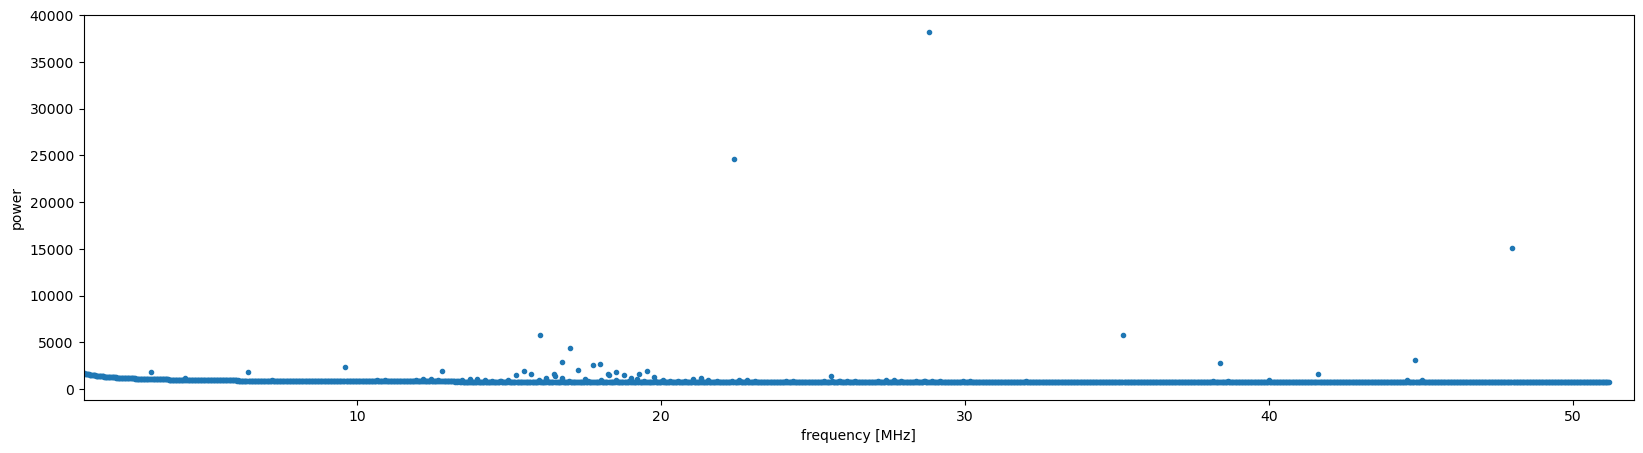

In [765]:

plt.figure(figsize=(20,5))
f = C.spectra[0][0].frequency
for i in [0]:
    s = np.mean([sp[i].data[:] for sp in C.spectra],axis=0)
    plt.plot(f[10:],s[10:],'.')

#plt.plot(f[2::4],s[2::4],'r.',markersize=3)
plt.xlim(1,52)
#plt.ylim(0,1e4)
#plt.ylim(3.0e6,5e6)
#plt.ylim(0.1e3,2e6)
#plt.ylim(3e6,2e7)
#plt.semilogy()
plt.xlabel('frequency [MHz]')
plt.ylabel('power')

Text(0, 0.5, 'power')

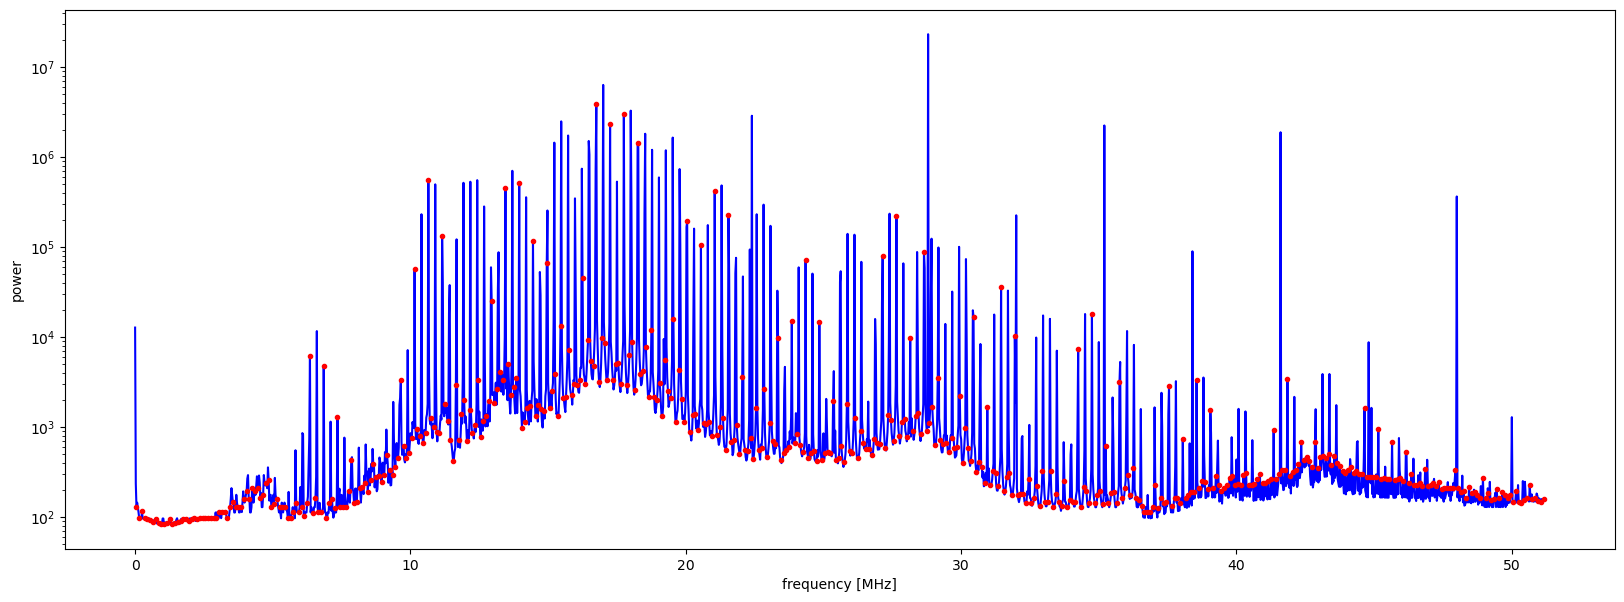

In [766]:

plt.figure(figsize=(20,7))
f = C.spectra[3][0].frequency
s = np.mean([sp[3].data[:] for sp in C.spectra],axis=0)
plt.plot(f,s,'b-')
#plt.plot(f,s*1.03,'k-')
plt.plot(f[2:2048:4],s[2:2048:4],'ro',markersize=3)

#plt.ylim(1e2,1e3)
#plt.xlim(48,52)
plt.semilogy()
plt.xlabel('frequency [MHz]')
plt.ylabel('power')

In [767]:
kcomb = np.arange(512)*4+2

def phase_up (first, second):
    """ Phases up second waveform to the first one """
    Nfft= len(first)*1024
    cross= first*np.conj(second)
    fi = np.zeros(Nfft,complex)
    fi[kcomb] = cross
    xi = np.real(np.fft.fft(fi))
    phi = xi.argmax()*2*np.pi/len(xi)
    second_phased = np.exp(+1j*phi*kcomb)*second
    return second_phased
    

In [768]:
_,wf = np.loadtxt("calibrator_231001.txt").T
wf = np.fft.rfft(np.hstack((wf,wf)))
wf = wf[2::4]

In [769]:


def coherent_addition (C):
    calib_data = []
    for ch in range(4):
        first = np.copy(C.calib_data[-1,ch,:])
        for second in C.calib_data[-1:1:-1,ch,:]:
            second_phased = phase_up(first,second)
            first += second_phased
            #plt.plot(np.angle(first[20:]/second_phased[20:]))
            #plt.plot(second_phased[20:])
            #stop()
        calib_data.append(first)
    calib_data = np.array(calib_data)
    calib_data_wf = []
    for ch in range(4):
        first = np.zeros(512,dtype=complex)
        for second in C.calib_data[1:,ch,:]:
            second_phased = phase_up(wf,second)
            first += second_phased
            #plt.plot(np.angle(first[20:]/second_phased[20:]))
            #plt.plot(second_phased[20:])
            #stop()
        calib_data_wf.append(first)
    calib_data_wf = np.array(calib_data_wf)
    return calib_data, calib_data_wf

calib_data, calib_data_wf = coherent_addition(C)
calib_datad, calib_data_wfd = coherent_addition(Cd)


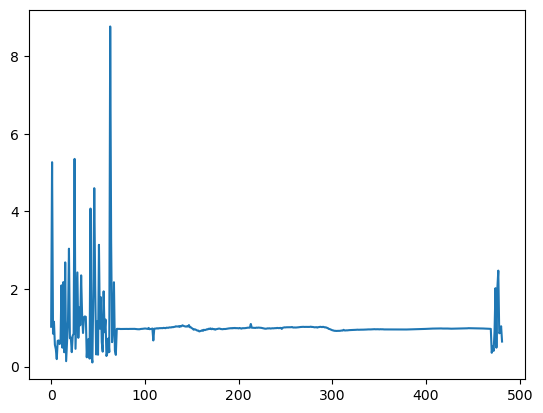

In [770]:
plt.plot(np.abs(calib_data[2,30:])/np.abs(calib_datad[2,30:]))
#plt.ylim(0.9,1.1)



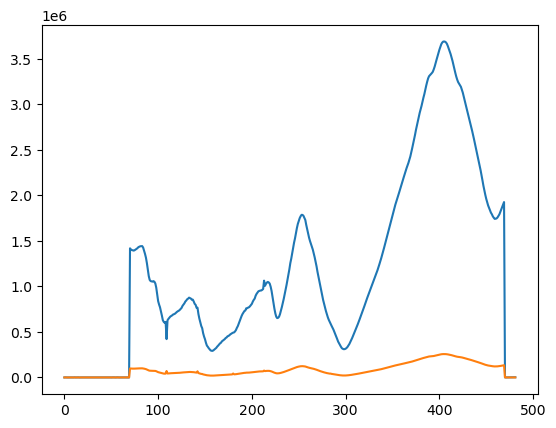

In [771]:
plt.plot(np.abs(calib_data[2,30:]))
plt.plot(np.abs(C.calib_data[1:,2,30:]).mean(axis=0)*4)

[]

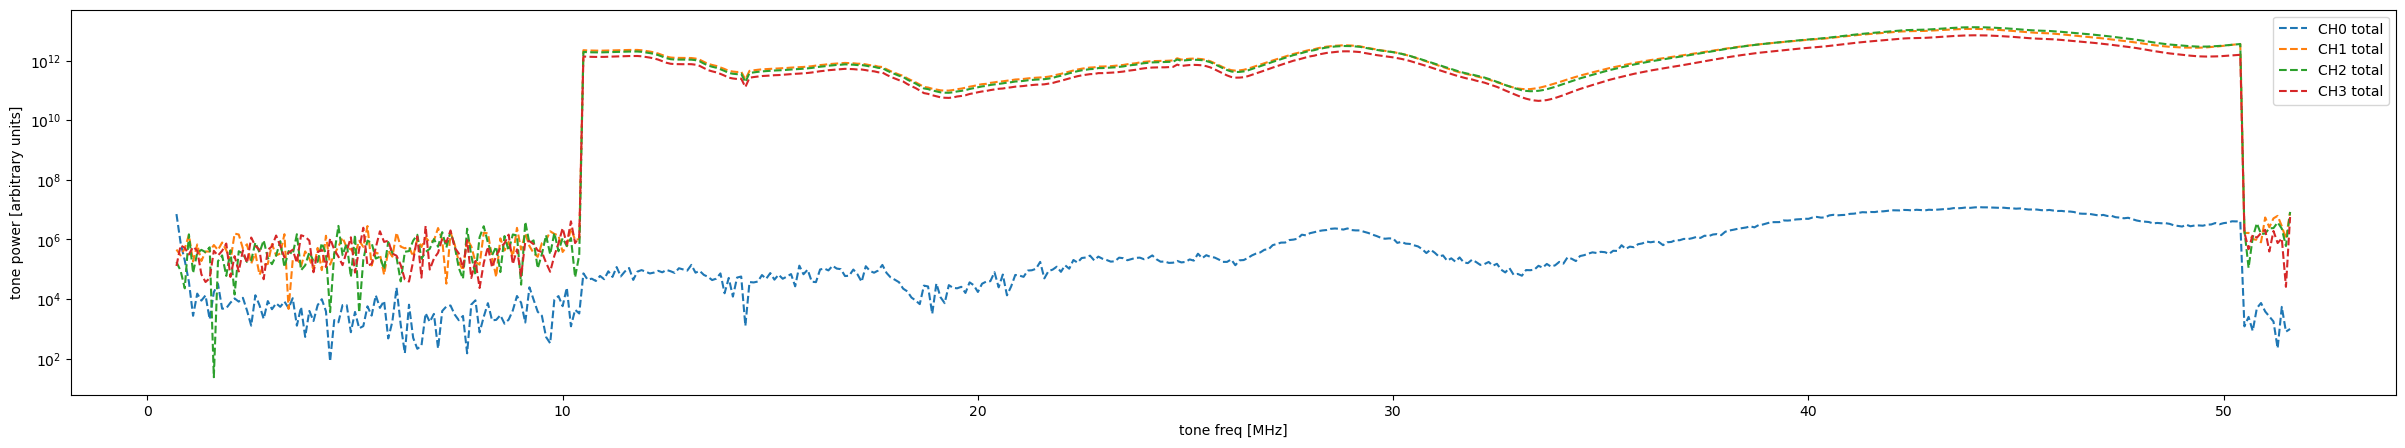

In [772]:
plt.figure(figsize=(30,5))
tfreq=0.5+0.1*np.arange(512)
for ch in range(0,4):
    #plt.plot(tfreq[2:],np.abs(C.calib_data[1:,ch,2:]**2).mean(axis=0),label='CH'+str(ch)+" one int period")
    da = np.abs(calib_data_wf[ch,2:]**2)
    plt.plot(tfreq[2:],da,ls='--',label='CH'+str(ch)+" total")
    #plt.plot(tfreq[2:],np.abs(Cd.calib_data[0:1,ch,2:]**2).mean(axis=0)*4,label='CH'+str(ch))
    #plt.plot(np.abs(Cx.calib_data[ch,1:,:]**1).mean(axis=0), label='CH'+str(ch))

    #plt.plot(np.abs(C.calib_data[ch,1:,100:500]**1).mean(axis=0)/np.abs(Cx.calib_data[ch,1:,100:500]**1).mean(axis=0), label='CH'+str(ch))


plt.legend()
plt.xlabel('tone freq [MHz]')
plt.ylabel('tone power [arbitrary units]')

#i1= np.real(C.calib_data[2,:,400])
#i2=np.imag(C.calib_data[2,:,400])
#i3= np.real(C.calib_data[3,:,400])
#plt.plot(np.imag(C.calib_data[3,:,100]))
#plt.plot(C.calib_data[0,:,400])
#plt.plot(r3**2+i3**2)

plt.semilogy()


[]

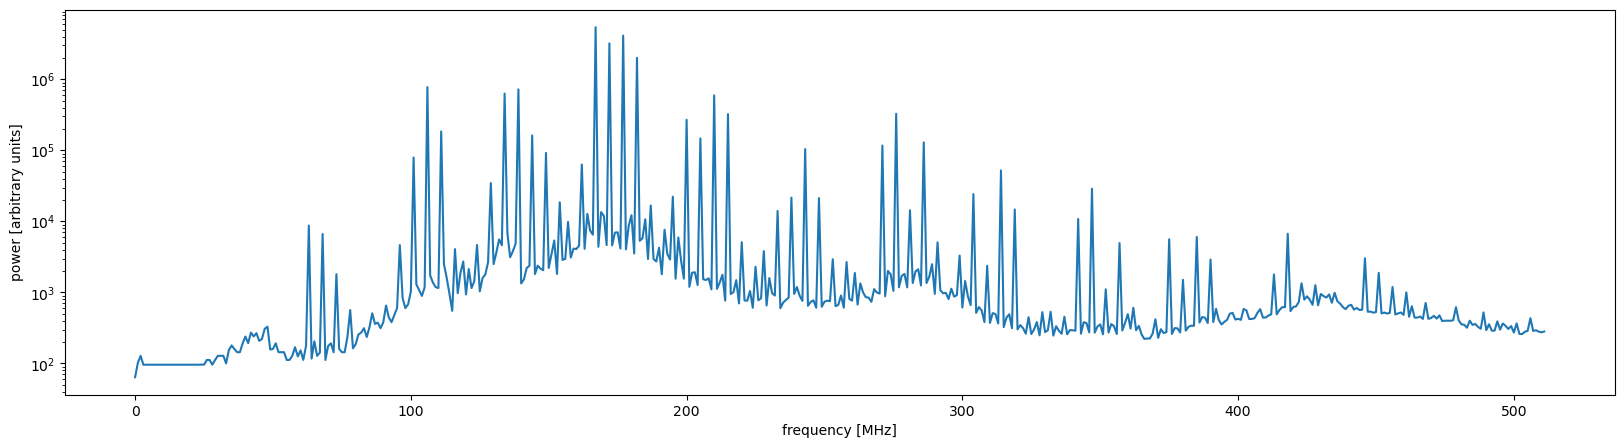

In [777]:
ch = 2
s = np.mean([sp[ch].data[:] for sp in C.spectra],axis=0)[2::4]
c = np.abs(C.calib_data[:,ch,:]**2).mean(axis=0)
fac = s[400]/c[400]*0.25
plt.figure(figsize=(20,5))
plt.plot(s)
#plt.plot(c*fac,'.c-')
plt.xlabel('frequency [MHz]')
plt.ylabel('power [arbitrary units]')
plt.semilogy()

Text(0, 0.5, 'time index')

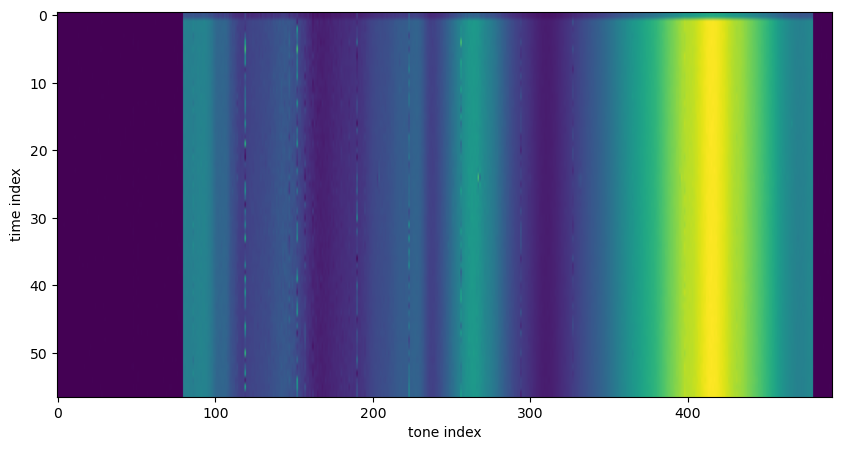

In [774]:
plt.figure(figsize=(10,5))
plt.imshow(np.abs(C.calib_data[1:,ch,20:]),aspect='auto')
plt.xlabel('tone index')
plt.ylabel('time index')

In [640]:
pcalib = phase_up(wf,calib_data_wf[1,:])

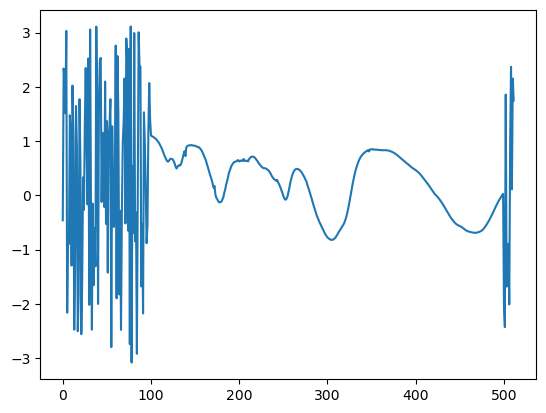

In [641]:
#plt.plot(np.angle(calib_data[1,:]/wf))
plt.plot(np.angle(pcalib/wf))

#plt.plot(np.imag(pcalib/wf))

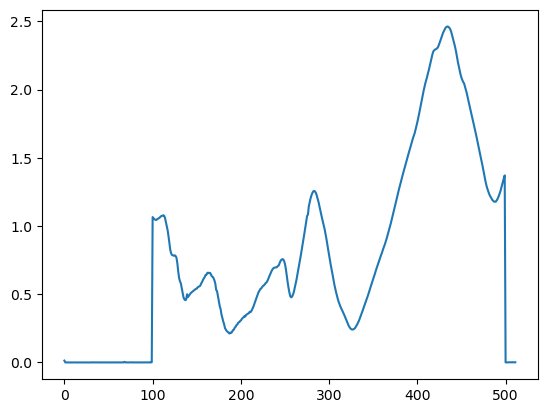

In [642]:
plt.plot(np.abs(pcalib/wf))